***
# Crop Coefficient Lab
### Simulation Site: Valença do Douro, Portugal
### Objectives: 
- #### Daily Temperatures Processing in Growing Season
- #### Estimation of Growing Degree Days (GDD)
- #### Estimation of Crop Coefficient
***

In [1]:
# Imports[{datetime.now()}] 
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import requests

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

***
# Gathering and processing of daily temperature data since growth season beggining (April 1st)
### Data Sources: WeatherAPI
***

In [2]:
# URL of the JSON data 
url = 'http://api.weatherapi.com/v1/history.json'

# API Key
api_key = '7117c65b99734b818da180521241308'

# Define the coordinates (Valença do Douro, Portugal)
latitude = 41.173156
longitude = -7.548373

# Combine the latitude and longitude into a single query parameter
coordinates = f"{latitude},{longitude}"

# Initialize empty lists to hold DataFrames for hourly and daily data
dfs_history_temp = []

# Determine number of days since growth season start (April 1st)
current_day_of_year = datetime.now().timetuple().tm_yday
season_start_day_of_year = datetime(year=2024, month=4, day=1).timetuple().tm_yday
n = current_day_of_year-season_start_day_of_year

# Iterate over the past n days
for day in range(1, n+1):
    # Calculate the date for the current iteration
    date = (datetime.now() - timedelta(days=day)).strftime('%Y-%m-%d')
    
    # Define the parameters for the request
    params = {
        'key': api_key,  # API key
        'q': coordinates,  # Coordinates as a location query
        'dt': date  # Date in the format YYYY-MM-DD
    }
    
    # Make the request to the API
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Print information
        print(f"[{datetime.now()}] WeatherAPI history request for {date} successfully fetched.")
        
        # Parse the JSON response
        data_response = response.json()
        
        # Extract maximum and minimum temperature for the day
        daily_data = data_response['forecast']['forecastday'][0]['day']
        max_temp = daily_data['maxtemp_c']  # Max temperature in Celsius
        min_temp = daily_data['mintemp_c']  # Min temperature in Celsius
        
        # Create a dictionary for the daily temperatures
        temp_data = {
            'date': date,
            'max_temp_c': max_temp,
            'min_temp_c': min_temp
        }
        
        # Create DataFrame for daily temperature data
        df_daily = pd.DataFrame([temp_data])  # Use a list to create a single-row DataFrame
        
        # Append the DataFrame to the list
        dfs_history_temp.append(df_daily)
    else:
        print(f"Failed to retrieve data for {date}: {response.status_code}")

# Concatenate all the DataFrames into one
df_history_temp = pd.concat(dfs_history_temp, ignore_index=True)

# Convert 'date' to datetime and set as the index
df_history_temp['date'] = pd.to_datetime(df_history_temp['date'])

# Ensure the index is sorted
df_history_temp = df_history_temp.sort_values(by='date').reset_index(drop=True)

# Set 'date' as the index
df_history_temp.set_index('date', inplace=True)

# Change date format to day-month-year
df_history_temp.index = df_history_temp.index.strftime('%d/%m/%Y')

# Print the processed DataFrame (debug)
# print(df_history_temp)

# Print information
print(f"[{datetime.now()}] Data has been successfully processed.")

[2024-08-13 19:52:33.932350] WeatherAPI history request for 2024-08-12 successfully fetched.
[2024-08-13 19:52:34.092186] WeatherAPI history request for 2024-08-11 successfully fetched.
[2024-08-13 19:52:34.177202] WeatherAPI history request for 2024-08-10 successfully fetched.
[2024-08-13 19:52:34.260744] WeatherAPI history request for 2024-08-09 successfully fetched.
[2024-08-13 19:52:34.344901] WeatherAPI history request for 2024-08-08 successfully fetched.
[2024-08-13 19:52:34.429900] WeatherAPI history request for 2024-08-07 successfully fetched.
[2024-08-13 19:52:34.522081] WeatherAPI history request for 2024-08-06 successfully fetched.
[2024-08-13 19:52:34.635788] WeatherAPI history request for 2024-08-05 successfully fetched.
[2024-08-13 19:52:34.748150] WeatherAPI history request for 2024-08-04 successfully fetched.
[2024-08-13 19:52:34.887564] WeatherAPI history request for 2024-08-03 successfully fetched.
[2024-08-13 19:52:35.006647] WeatherAPI history request for 2024-08-02

In [3]:
# URL of the JSON data
url = 'http://api.weatherapi.com/v1/forecast.json'

# API Key
api_key = '351cfc6bc10e44c1b75161211241407'

# Define the coordinates (Valença do Douro, Portugal)
latitude = 41.173156
longitude = -7.548373

# Combine the latitude and longitude into a single query parameter
coordinates = f"{latitude},{longitude}"

# Define the parameters for the forecast request
params = {
    'key': api_key,         # API key
    'q': coordinates,       # Coordinates as a location query
    'days': 2,              # Number of days to forecast
}

# Make the request to the API for the forecast
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    # Print information
    print(f"[{datetime.now()}] WeatherAPI forecast request for current and following day successfully fetched.")
    
    # Parse the JSON response
    data_response = response.json()
    
    # Extract daily forecast data for the next 2 days
    forecast_days = data_response['forecast']['forecastday']
    
    # Initialize an empty list to hold daily forecast data
    forecast_data = []

    # Iterate over the forecast days
    for day in forecast_days:
        # Extract the date, max temperature, and min temperature
        date = day['date']
        max_temp = day['day']['maxtemp_c']
        min_temp = day['day']['mintemp_c']
        
        # Create a dictionary with the daily temperature data
        daily_temp_data = {
            'date': date,
            'max_temp_c': max_temp,
            'min_temp_c': min_temp
        }
        
        # Append the dictionary to the list
        forecast_data.append(daily_temp_data)
    
    # Create a DataFrame from the list of daily forecast data
    df_forecast_temp = pd.DataFrame(forecast_data)
    
    # Convert 'date' to datetime and set as the index
    df_forecast_temp['date'] = pd.to_datetime(df_forecast_temp['date'])
    
    # Sort the DataFrame by date
    df_forecast_temp = df_forecast_temp.sort_values(by='date').reset_index(drop=True)
    
    # Set 'date' as the index
    df_forecast_temp.set_index('date', inplace=True)
    
    # Change date format to day-month-year
    df_forecast_temp.index = df_forecast_temp.index.strftime('%d/%m/%Y')
    
else:
    print(f"Failed to retrieve forecast data: {response.status_code}")

# Print the processed DataFrame (debug)
# print(df_forecast_temp)

# Join history and forecast data
df_gdd = pd.concat([df_history_temp, df_forecast_temp], axis=0)

# Print the processed DataFrame (debug)
# print(df_temp)

# Print information
print(f"[{datetime.now()}] Data has been successfully processed.")

[2024-08-13 19:52:54.292978] WeatherAPI forecast request for current and following day successfully fetched.
[2024-08-13 19:52:54.296154] Data has been successfully processed.


***
# Estimation of Growing Degree Days (GDD) and Accumulated GDD
### Method: using maximum and minimum temperature for the day
***

In [4]:
print(f"[{datetime.now()}] Estimating Growing Degree Days (GDD) with provided data.")

# Function to estimate Growing Degree Days for each day
def calculate_gdd(row):
    T_base = 10 # Base temperature considered in Douro Valleys
    T_max = row['max_temp_c']
    T_min = row['min_temp_c']
    GDD = (T_max+T_min)/2 - T_base
    if (GDD < 0): GDD=0
    return GDD

# Estimate Growing Degree Days for each day
df_gdd['gdd'] = df_gdd.apply(calculate_gdd, axis=1)

# Estimate Growing Degree Days Accumulated sum
df_gdd['cumsum_gdd'] = df_gdd['gdd'].cumsum()

# Print the processed DataFrame (debug)
# print(df_gdd)

# Print information
print(f"[{datetime.now()}] Growing Degree Days (GDD) have been successfully estimated.")

[2024-08-13 19:52:54.301889] Estimating Growing Degree Days (GDD) with provided data.
[2024-08-13 19:52:54.303729] Growing Degree Days (GDD) have been successfully estimated.


## Estimated Data Analysis

[2024-08-13 19:52:54.575832] Estimated Growing Degree Days for 13/08/2024: 11.60 GDD, which results in Accumulated 1195.00 GDD.
[2024-08-13 19:52:54.575942] Estimated Growing Degree Days for 14/08/2024: 13.60 GDD, which results in Accumulated 1208.60 GDD.


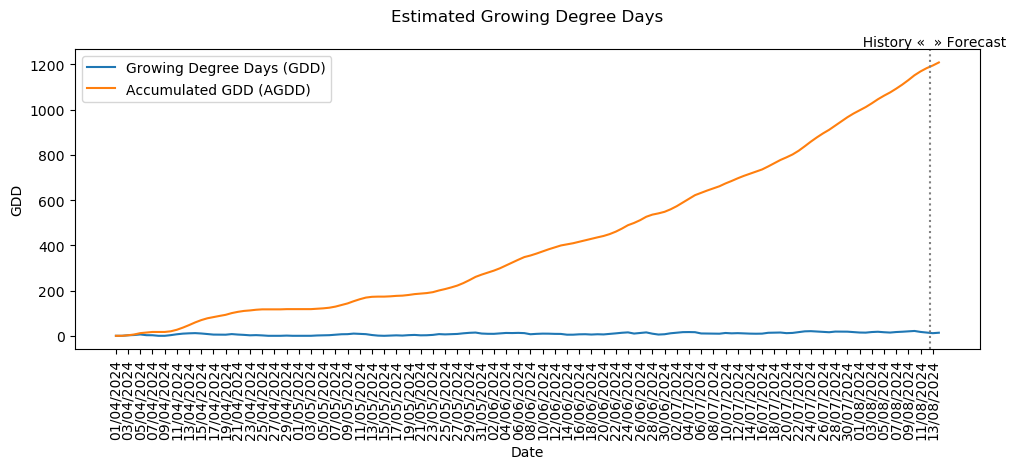

In [5]:
# Translate collumns to name
def gdd_translation(column):
    if (column == "gdd"): param = "Growing Degree Days (GDD)"
    if (column == "cumsum_gdd"): param = "Accumulated GDD (AGDD)"
    return param

# Plot Style Function
def applyPlotStyle():
    plt.title(f"Estimated Growing Degree Days", pad=20)
    plt.xlabel('Date')
    plt.ylabel('GDD')
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(df_gdd), 2))
    plt.tight_layout()
    x_pos = len(df_gdd)-2.5
    plt.axvline(x=x_pos, color='gray', linestyle=':')
    y_min, y_pos = plt.ylim()
    plt.text(len(df_gdd)-2.5, y_pos, '  History «  » Forecast', va='bottom', ha='center')
    
# Plot estimated reference evapotranspiration vs precipitation history
plt.figure().set_figwidth(10)
for column in df_gdd.columns:
    if column in ["gdd", "cumsum_gdd"]:
        param = gdd_translation(column)
        plt.plot(df_gdd.index.to_numpy(), df_gdd[column].to_numpy(), label=param)
plt.legend(loc="upper left")
applyPlotStyle()
plt.savefig(f"output_graphs/estimated_gdd.png")

# Display the results
last_rows = df_gdd.tail(2)
for index, row in last_rows.iterrows():
    print(f"[{datetime.now()}] Estimated Growing Degree Days for {index}: {row['gdd']:.2f} GDD, which results in Accumulated {row['cumsum_gdd']:.2f} GDD.")

***
# Estimation of Crop Coefficient K<sub>c</sub>
### Method: using standard relation table between K<sub>c</sub> and Accumulated GDD
***

In [6]:
# Kc for grapevines related to accumulated GDD data (for ºF)
gdd_f = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 
         520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800, 820, 840, 860, 880, 900, 920, 940, 960, 980, 1000, 
         1020, 1040, 1060, 1080, 1100, 1120, 1140, 1160, 1180, 1200, 1220, 1240, 1260, 1280, 1300, 1320, 1340, 1360, 1380, 1400, 1420, 
         1440, 1460, 1480, 1500, 1520, 1540, 1560, 1580, 1600, 1620, 1640, 1660, 1680, 1700, 1720, 1740, 1760, 1780, 1800, 1820, 1840, 
         1860, 1880, 1900, 1920, 1940, 1960, 1980, 2000, 2020, 2040, 2060, 2080, 2100, 2120, 2140, 2160, 2180, 2200, 2220, 2240, 2260, 
         2280, 2300, 2320, 2340, 2360, 2380, 2400, 2420, 2440, 2460, 2480, 2500, 2520, 2540, 2560, 2580, 2600, 2620, 2640, 2660, 2680, 
         2700, 2720, 2740, 2760, 2780, 2800, 2820, 2840, 2860, 2880]
kc = [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.02, 0.05, 0.09, 0.12, 0.14, 0.16, 0.18, 0.20, 0.21, 0.22, 
      0.23, 0.24, 0.25, 0.25, 0.25, 0.26, 0.26, 0.26, 0.27, 0.27, 0.27, 0.27, 0.28, 0.29, 0.29, 0.29, 0.30, 0.32, 0.33, 0.35, 0.36, 
      0.38, 0.40, 0.42, 0.42, 0.43, 0.44, 0.45, 0.45, 0.46, 0.47, 0.48, 0.49, 0.49, 0.50, 0.51, 0.52, 0.54, 0.55, 0.56, 0.58, 0.59, 
      0.59, 0.60, 0.62, 0.62, 0.64, 0.65, 0.66, 0.68, 0.69, 0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.77, 0.78, 0.79, 0.79, 0.80, 0.81, 
      0.82, 0.83, 0.83, 0.85, 0.85, 0.85, 0.84, 0.83, 0.81, 0.79, 0.77, 0.75, 0.73, 0.72, 0.69, 0.68, 0.66, 0.65, 0.63, 0.60, 0.58, 
      0.56, 0.53, 0.52, 0.50, 0.47, 0.45, 0.42, 0.41, 0.39, 0.37, 0.35, 0.33, 0.33, 0.31, 0.30, 0.29, 0.28, 0.27, 0.27, 0.26, 0.26, 
      0.26, 0.26, 0.26, 0.26, 0.27, 0.28, 0.29, 0.29, 0.31, 0.31, 0.31, 0.32, 0.32, 0.34, 0.34, 0.35, 0.36, 0.36, 0.36]

# Convert GDD in ºF to ºC (9 GDD calculated using Fahrenheit are equal to 5 GDD using Celsius)
gdd_c = [x / 1.8 for x in gdd_f]

# Define the grapevines relation between  GGD : Kc (in Celsius)
gdd_to_kc = dict(zip(gdd_c, kc))

# Function to estimate Kc from Accumulated GDD
def estimate_kc_from_gdd(row):
    # Get GDD value from DataFrame
    gdd = row['cumsum_gdd']
    # Calculate using linear interpolation
    interp_gdd_to_kc = interp1d(list(gdd_to_kc.keys()), list(gdd_to_kc.values()))
    kc = interp_gdd_to_kc(gdd)
    return kc

# Estimate Kc
df_gdd['kc'] = df_gdd.apply(estimate_kc_from_gdd, axis=1)

# Store the data on local csv file
df_gdd.to_csv((f"output_data/estimated_gdd_kc.csv"))

# Print the processed DataFrame (debug)
# print(df_gdd)

# Print information
print(f"[{datetime.now()}] Crop Coefficient (Kc) has been successfully estimated.")

[2024-08-13 19:52:54.867208] Crop Coefficient (Kc) has been successfully estimated.


## Estimated Data Analysis

[2024-08-13 19:52:55.103630] Estimated Crop Coefficient for 13/08/2024: 0.51
[2024-08-13 19:52:55.103733] Estimated Crop Coefficient for 14/08/2024: 0.48


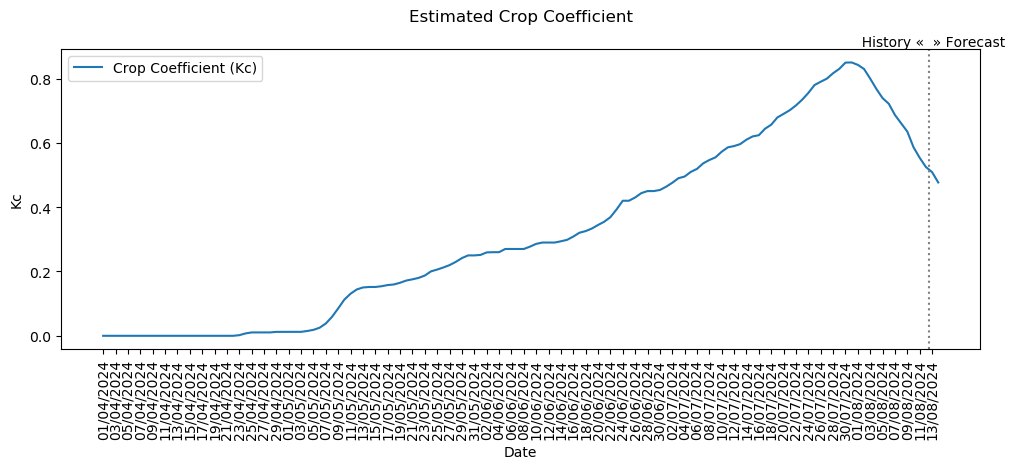

In [7]:
# Translate collumn to name
def kc_translation(column):
    if (column == "kc"): param = "Crop Coefficient (Kc)"
    return param

# Plot Style Function
def applyPlotStyle():
    plt.title(f"Estimated Crop Coefficient", pad=20)
    plt.xlabel('Date')
    plt.ylabel('Kc')
    plt.xticks(rotation=90)
    plt.xticks(range(0, len(df_gdd), 2))
    plt.tight_layout()
    x_pos = len(df_gdd)-2.5
    plt.axvline(x=x_pos, color='gray', linestyle=':')
    y_min, y_pos = plt.ylim()
    plt.text(len(df_gdd)-2.5, y_pos, '  History «  » Forecast', va='bottom', ha='center')
    
# Plot estimated reference evapotranspiration vs precipitation history
plt.figure().set_figwidth(10)
for column in df_gdd.columns:
    if column in ["kc"]:
        param = kc_translation(column)
        plt.plot(df_gdd.index.to_numpy(), df_gdd[column].to_numpy(), label=param)
plt.legend(loc="upper left")
applyPlotStyle()
plt.savefig(f"output_graphs/estimated_kc.png")

# Display the results
last_rows = df_gdd.tail(2)
for index, row in last_rows.iterrows():
    print(f"[{datetime.now()}] Estimated Crop Coefficient for {index}: {row['kc']:.2f}")